# Clase 2: Modelos en variables de estado

La clase pasada vimos cómo resolver un problema de control (aunque no con la solución más típica). Diseñamos una especie de compensador que permitía anular una perturbación de un sistema, en base al problema que tenía Ogata en la fábrica con un puente grúa. Pasamos por todos los pasos del proceso de diseño en ingeniería de control (y en realidad de muchas otras áreas dentro de la ingeniería), quizás sin darnos cuenta:

1. Modelado
2. Análisis
3. Diseño
4. Implementación y análisis de los resultados (aunque de manera simulada)

De paso, usamos el ejercicio para repasar algunas herramientas de análisis básicas en control clásico.

El problema fue resuelto desde el punto de vista de la función de transferencia, que es un modelo que relaciona entradas y salidas. Es el método usual del control clásico: primero plantear la ecuación o ecuaciones diferenciales del sistema (o en diferencias) y luego transformar al dominio de Laplace o de la frecuencia compleja s (o z) para realizar el análisis, y a partir de ahí, proponer soluciones.

El último ítem del problema, introducía otro tipo de modelo, que es uno en el dominio del tiempo: la ecuación de estado.

## Ecuación de estado

En este "nuevo" enfoque vamos a describir a un sistema en el dominio del tiempo y a partir de la famosa ecuación de estado, que es nada mas y nada menos que $n$ ecuaciones diferenciales de primer orden para el caso de un sistema descripto por $n$ variables de estado. Pero no tienen cualquier forma esas $n$ ecuaciones diferenciales.

En general, en muchos sistemas de variables concentradas podremos llegar a ecuaciones diferenciales de primer orden de este estilo:

$$ \frac{d x_{1}}{d t} = f_{1}(x_1(t), x_2(t), \dots, x_n(t),t,u)$$
$$ \vdots $$
$$ \frac{d x_{n}}{d t} = f_{n}(x_1(t), x_2(t), \dots, x_n(t),t,u)$$

Por simplicidad $u$ la consideramos de dimensión 1, es decir única entrada. Estas ecuaciones dependen de funciones arbitrarias $f_{1} \dots f_{n}$, e indirectamente dependen de las variables $x_{1}\dots x_{n}$, llamadas variables de estado.

Es una manera complicada de decir que la ecuación de estado relaciona la derivada en el tiempo de cada una de estas variables de estado, con la variable misma, las otras variables, la entrada o entradas y el tiempo. Si llegamos a dicha relación, todas esas ecuaciones forman la ecuación de estados, que en forma vectorial se escribe como:

$$ \frac{d \mathbf{x}}{d t} = \mathbf{f} (\mathbf{x}, u, t) $$

Donde $\mathbf{x}$ es el vector de estado del sistema:

$$\mathbf{x} = \begin{bmatrix} x_{1} \\ x_{2} \\  \vdots\\  x_{n} \end{bmatrix}$$

Formado por las $n$ variables de estado.

Hablamos del estado del sistema, o vector de estado, como el valor que toman dichas variables en un instante de tiempo dado:
 
$$\mathbf{x}(t_0) = \begin{bmatrix} x_{1}(t_0) \\ x_{2}(t_0) \\  \vdots\\  x_{n}(t_0) \end{bmatrix}$$

Y en general, en función del tiempo t cuando nos referimos a las soluciones de la ecuación de estado, dada una condición inicial $\mathbf{x}_0 = \mathbf{x}(t_0)$ y una entrada $u(t)$:

$$\mathbf{x}(t) = \begin{bmatrix} x_{1}(t) \\ x_{2}(t) \\  \vdots\\  x_{n}(t) \end{bmatrix}$$

Nos referiremos a éstas como trayectoria en el espacio de estado determinada por las soluciones $x_1(t) \dots x_n(t)$, componentes del vector de estado solución.

### Modelo interno

Notar que hasta ahora no hablamos de la señal o variable de salida. ¿Qué define la salida? En general, es una variable física de interés que eventualmente en esta materia vamos a querer controlar. Por ejemplo, la tensión en el capacitor de salida de una fuente, la temperatura o temperaturas de un sistema térmico, las corrientes en un motor trifásico, o las coordenadas que definen la orientación en un satélite.

Eso significa que, en el caso más general que presentamos, podremos tener $l$ variables de interés y queda definida la salida de la siguiente forma:

$$ \mathbf{y} = \begin{bmatrix} y_1 \\ \vdots \\ y_l \end{bmatrix} = \begin{bmatrix} g_1(x_1, \dots, x_n, u, t) \\ \vdots \\ g_l(x_1, \dots, x_n, u, t) \end{bmatrix}$$

Además, esto nos muestra que la salida está formada por información del vector de estado. 

Es por eso, que los modelos en variables de estado definen un modelo con información interna al sistema, además de dejar claramente definidas entradas y salidas. 

Con el modelo de función de transferencia, además de perder información sobre la condición inicial del sistema, también se puede estar perdiendo información importante sobre variables internas del sistema. Esta es otra ventaja del modelo en variables de estado.

### Caso lineal

Para los sistemas lineales, las funciones $f_i$ y $g_j$ de las ecuaciones de estado, son combinaciones lineales de las variables de estado y de las entradas, y se pueden simplificar como se indica a continuación:

Ecuación de estado

$$ \frac{d \mathbf{x}}{d t} = \mathbf{A}(t) \mathbf{x} + \mathbf{B}(t) \mathbf{u} $$

Ecuación de salida

$$ \mathbf{y} = \mathbf{C}(t) \mathbf{x} + \mathbf{D}(t) \mathbf{u} $$

Ahora, ¿qué son las variables de estado? Vayamos a un ejemplo físico intuitivo, aunque después veremos que no necesariamente las variables de estado van a tener un correlato o una interpretación física.

Probablemente en el futuro eliminemos la notación en negrita para los vectores y matrices para simplificar, pero deberemos estar atentos a las dimensiones de las variables y constantes en cada caso.

### Ejemplo intuitivo

Tomemos un circuito RC sin entrada, con una condición inicial data por la tensión en el capacitor $v_C(0)=1~$V:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1upxlMzJH-KvxEFsStUZu0Qe7kcxm8qIs' />
<figcaption>Circuito RC</figcaption></center>
</figure>

La ecuación de este sistema, es la siguiente (demostrar):

$$ \frac{dv_C}{dt} = -\frac{1}{RC} v_C $$

Y sin duda, ésta es una ecuación de estado del sistema y la variable de estado es $v_C$. Como sabemos (demostrar) la solución para la condición inicial dada:

$$ v_C(t) = e^{-t/RC}, t \geq 0$$

Que es solución de la ecuación de estado.

La intuición con este problema, ya muy analizado en nuestra carrera, nos indica que conocido el valor de $v_C$ en un instante determinado $t_1$, la evolución del sistema queda determinada para $t > t_1$. Y esa es la idea o el concepto de variable de estado, y de vector de estado en sistemas de mayor orden. El vector de estado contiene todas las variables importantes del sistema y la ecuación de estado determina la relación entre dichas variables, y la entrada o entradas, que en este ejemplo fue omitida para simplificarlo.


Suficiente introducción teórica. ¡Manos a la obra! Empecemos por un ejemplo de la guía de ejercicios.

## Ejemplo: 

Con este ejemplo buscamos:
* Empezar con un modelo simple e intuitivo en variables de estado
* Analizar el orden de un modelo
* Introducir los diagramas de simulación

<figure>
<center>
<img src='https://drive.google.com/uc?id=1Azll11-l10caRq50Be8j2DAw8lyO40v1' />
<figcaption>Ejercicio 1</figcaption></center>
</figure>

Este ejercicio ya fue expuesto en la clase teórica. Lo repetimos a manera de repaso. Tratemos de ir planteando los diagramas de simulación en cada caso y repasar el concepto de orden del sistema, es decir la cantidad de condiciones iniciales para obtener $y(t)$ en cada caso.

a) $u = F$  con  $y = \dot{x}$

Nos interesa (salida) la velocidad de la masa. Entonces, al menos su velocidad debe ser variable de estado.

$$ x_1 = \dot{x} $$

Y la física del problema, nos indica que $F = u = M \ddot{x}$, que es la ecuación de estado. Es decir:

$$ \dot{x}_1 = \frac{u}{M} $$

Y su ecuación de salida es:

$$ y = \dot{x}_1 $$

Es decir:

$$ \mathbf{A} = 0 $$
$$ \mathbf{B} = 1/M $$
$$ \mathbf{C} = 1 $$
$$ \mathbf{D} = 0 $$

El diagrama de simulación es:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1X7h6S93sKtDQDFa0EvBEXP3wTaYZC9da' />
<figcaption>Ejercicio 1 a): Diagrama de simulación</figcaption></center>
</figure>

**Para pensar:**

* ¿Cuántas condiciones iniciales son necesarias para hallar $y(t)$?

    *Necesito una condicion inicial, necesito la velocidad inicial*

* ¿Cómo deberías definir el vector de estado para que el bloque $\frac{1}{M}$ quede del otro lado del integrador en el diagrama de simulación?

    *Con definir x_1=M $\dot{x}$*
* ¿Podrías haber definido una ecuación de estado de mayor orden? Si no se te ocurre, mirá el siguiente caso y volvé a pensarlo.

    *Si. simplemente eligiciendo las posicion y velocidad como variables de estado y de ahi eligiendo la matriz C para tener la salida indicada*

b) $u = F$  con  $y = x$

En este caso, la variable de interés es la posición de la masa. Empezamos entonces por definirla como variable de estado:

$$ x_1 = x $$

Esta hace que quede definida una ecuación de estado:

$$ \dot{x}_1 = \dot{x} $$

Y aparece la velocidad, que también tendremos que definir como variable de estado para que la ecuación anterior sea parte de una ecuación de estado. Es decir:

$$ x_2 = \dot{x} $$

tal que

$$ \dot{x}_1 = x_2$$

Y al ser variable de estado, también es necesario que:

$$ \dot{x}_2 = \ddot{x} = \frac{u}{M}$$

Y con estas últimas dos ecuaciones diferenciales de primer orden, llegamos a la ecuación de estado:

$$\mathbf{\dot{x}} = \begin{bmatrix}\dot{x}_1\\\dot{x}_2\end{bmatrix}= \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix} \mathbf{x} +  \begin{bmatrix}0\\1/M\end{bmatrix} u$$

Y la ecuación de salida queda:

$$ y = x_1 $$

Es decir:

$$ \mathbf{A} = \begin{bmatrix}0 & 1\\0 & 0\end{bmatrix} $$
$$ \mathbf{B} = \begin{bmatrix}0 \\ 1/M \end{bmatrix} $$
$$ \mathbf{C} = \begin{bmatrix} 1 & 0\end{bmatrix} $$
$$ \mathbf{D} = 0 $$

El diagrama de simulación es:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1E6nHPBonAvHbs-FUy96Osxo4OZumUk1_' />
<figcaption>Ejercicio 1 b): Diagrama de simulación</figcaption></center>
</figure>

**Responder:**

* ¿Cómo se llama esa asignación de variables de estado?

    *...canonica?...BUSCAR*
* ¿Cuántas condiciones iniciales son necesarias para hallar $y(t)$ en este caso?

    *Dos, la velocidad inicial y la posicion inicial.*

**Ejercicio**

Terminá de resolver el ejercicio:

c) $u = F$  con  $y = \ddot{x}$

sera:

$$ y=\frac{1}{M}u $$
este sistema no tiene dinamica, si tuviera que expresarlo en forma matricial la matriz **B= 0_{1x2}** y la matriz **D=1/M**

## Ejemplo: 

Con este ejemplo buscamos:
* Seguir practicando con modelos en variables de estado
* Evaluar la reducción de orden de un modelo

<figure>
<center>
<img src='https://drive.google.com/uc?id=12ZZF-o797o6AKPHSzsra_8tGEa9WXXja' />
<figcaption>Ejercicio 2</figcaption></center>
</figure>

Para ambos casos a) y b), debemos primero plantear las ecuaciones físicas. Asumiremos que ambas masas se encuentran en la posición de equilibrio, y como son puntuales es el origen de coordenadas.

**Ejercicio**

Verificá analíticamente que llegás a las siguientes ecuaciones:

$$ F - K (x_1 - x_2) - B (\dot{x}_1 - \dot{x_2}) = M_1 \ddot{x}_1 $$
$$ K (x_1 - x_2) + B (\dot{x}_1 - \dot{x}_2) = M_2 \ddot{x}_2 $$

Nos preguntamos cuántas y qué variables de estado necesitamos utilizar en el modelo para poder obtener $y = x_1$ como variable de salida, o sea la posición de la masa $M_1$.

Por defecto, y si nos guiamos por el ejercicio anterior con un sistema de posicionamiento de masas puntuales, deberíamos utilizar posición y velocidad de cada masa como variables de estado, es decir:

$$ \mathbf{z} = \begin{bmatrix} x_1\\ \dot{x}_1\\  x_2 \\ \dot{x}_2 \end{bmatrix} $$

Notar que podríamos definirlas en otro orden y las ecuaciones de estado serían distintas.

**Ejercicio**

Demostrá que:

**RTA:**
reordenamos las ecuaciones
$$ \ddot{x}_1= \frac{F}{M_1} -\frac{K}{M_1} (x_1 - x_2) -\frac{B}{M_1} (\dot{x}_1 - \dot{x_2})  $$
$$ \ddot{x}_2= \frac{K}{M_2} (x_1 - x_2) + \frac{B}{M_2} (\dot{x}_1 - \dot{x}_2)  $$

reemplazamos por las variables de estado seleccionadas.

$$ \dot{z}_2= \frac{F}{M_1} -\frac{K}{M_1} (z_1 - z_3) -\frac{B}{M_1} (z_2 - z_4)  $$
$$ \dot{z}_4= \frac{K}{M_2} (z_1 - z_3) + \frac{B}{M_2} (z_2 - z_4)  $$

y luego visto en forma matricial sera:

$$ \mathbf{A} = \begin{bmatrix} 0 & 1 & 0 & 0 \\ -K/M_1 & -B/M_1 & K/M_1 & B/M_1\\ 0 & 0 & 0 & 1\\ K/M_2 & B/M_2 & -K/M_2 & -B/M_2 \end{bmatrix} $$

$$ \mathbf{B} = \begin{bmatrix} 0 \\ 1/M_1 \\ 0 \\ 0 \end{bmatrix}$$

**Ejercicio**

¿Cómo queda la ecuación de salida en el caso a) y el caso b)?

**RTA-a)**

$$ \mathbf{y} =\begin{bmatrix}1& 0& 0& 0\end{bmatrix} \begin{bmatrix} x_1\\ \dot{x}_1\\  x_2 \\ \dot{x}_2 \end{bmatrix} $$

En el caso b) debemos observar que el sistema tiene 4 variables de estado, pero en realidad, si lo que importa es la posición relativa de las dos masas, hay un sistema de menor órden que representa ese problema. Acá van unas pistas.

Planteá como variable de estado:

$$ w_1 = y = x_1 - x_2 $$

Notá que la ecuación de estado, deberá contener:

$$ \dot{w}_1 = \dot{x}_1 - \dot{x}_2 = w_2 $$

**RTA-b)**

$$ \mathbf{w} =\begin{bmatrix} x_1-x_2\\ \dot{w}_1\\ \dot{w}_2 \end{bmatrix} $$
entonces habrá que reordenar las ecuaciones que teniamos para poder crear nuestra nueva representacion en espacio de estados.
en este caso coinciden las cantidades de variables de estado con el numero de condiciones iniciales.

$$ \begin{bmatrix} \dot{w}_1\\ \dot{w}_2\\ \dot{w}_3 \end{bmatrix} =
   \begin{bmatrix} 0 & -1& 1\\ \frac{K}{M_1} & -\frac{B}{M_1}& \frac{B}{M_1}\\ -\frac{K}{M_2} & \frac{B}{M_2}& -\frac{B}{M_2} \end{bmatrix} 
   \begin{bmatrix} w_1\\ w_2\\ w_3 \end{bmatrix} + \begin{bmatrix} 0\\ \frac{1}{M_1}\\ 0 \end{bmatrix}
$$

$$ \mathbf{y} = \begin{bmatrix} 1& 0& 0 \end{bmatrix} \begin{bmatrix} w_1\\ w_2\\  w_3  \end{bmatrix} $$
**Ejercicio**

¿Podés hallar $\dot{w}_2$? ¿Alcanzan estas dos variables de estado? Encontrá las matrices $\mathbf{A}$, $\mathbf{B}$, $\mathbf{C}$ y $\mathbf{D}$.

## Ejemplo: 

Con este ejemplo buscamos:
* Comparar dos tipos de asignaciones de variables de estado: variables de estado asociadas a elementos acumuladores de energía y variables de estado de fase
* Hallar ecuaciones de estado a partir de ecuaciones diferenciales con derivadas de las entrada u

<figure>
<center>
<img src='https://drive.google.com/uc?id=1Q_5eabxWihse0yWKcxFN5t2ClszF6k4y' />
<figcaption>Ejercicio 4</figcaption></center>
</figure>

**Ejercicio**

a) Primero, planteá como indica el ejercicio las ecuaciones del circuito (mallas y nodos) para llegar a una ecuación diferencial única en función de la variable $y = v_L$ salida con $u = v$ entrada.

Deberías llegar a la siguiente ecuación diferencial:

$$ \frac{d^2 v}{dt^2} + \frac{1}{RC} \frac{dv}{dt} = \frac{d^2 v_L}{dt^2} + \frac{2}{RC} \frac{d v_L}{dt} + \frac{v_L}{LC}$$

Como vimos en la clase teórica, en este caso no es directa la asignación de variables de estado de fase. Usemos el método de la transformada de Laplace (suponer condiciones iniciales nulas):

$$ s^2 V(s) + \frac{1}{RC} s V(s) = s^2 V_L(s) + \frac{2}{RC} s V_L(s) + \frac{1}{LC} V_L(s)$$

Como $ U(s) = V(s)$ y $Y(s) = V_L(s)$, y si además sacamos factor común y definimos polinomios numerador y denominador:

$$ b(s) U(s) = a(s) Y(s) $$

Con:

$$b(s) = s^2 + \frac{1}{RC} s$$

y

$$a(s) = s^2+ \frac{2}{RC} s + \frac{1}{LC} $$

Definimos:

$$Z(s) \overset{\Delta}{=} \frac{U(s)}{a(s)}$$

De manera tal que:

$$ Y(s) = b(s) \frac{U(s)}{a(s)} = b(s)Z(s) $$ 

tiene como transformada inversa de Laplace:

$$ y = \frac{d^2 z}{dt^2} + \frac{1}{RC} \frac{dz}{dt} $$

y $ U(s) = a(s) Z(s) $ vale en el dominio del tiempo:

$$ u = \frac{d^2 z}{dt^2} + \frac{2}{RC} \frac{d z}{dt} + \frac{z}{LC}$$

Con estas dos ecuaciones se construye un diagrama de simulación como el siguiente:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1PuWRSkL2EjVmRSgvGlAlJQ3GvfJXoUZU' />
<figcaption>Ejercicio 4 a): Diagrama de simulación</figcaption></center>
</figure>

Verificá que a partir del diagrama se obtiene el siguiente sistema:

$$ \mathbf{\dot{x}} =  \begin{bmatrix} 0 & 1\\ -\frac{1}{LC} & -\frac{2}{RC} \end{bmatrix} \mathbf{x} + \begin{bmatrix} 0 \\ 1\end{bmatrix} u$$

$$ y = \begin{bmatrix}-\frac{1}{LC} -\frac{1}{RC} \end{bmatrix} \mathbf{x} + u $$

**Ejercicio**

b) Resolvé para las variables de estado de los acumuladores de energía independientes del circuito. Dibujá el diagrama de simulación.

**Para pensar:**

* ¿Cómo redibujarías el diagrama de simulación para que queden explícitos los coeficientes de la matriz C en el mismo?
* ¿Cómo se puede usar el hecho de que el la ecuación diferencial es lineal para hallar de una manera más rápida el diagrama de simulación en a) y la descripción en variables de estado de fase?
* ¿Podés hallar una transformación de variables de estado que lleve de una a otra descripción? Este tema lo veremos más adelante, pero puede ser un buen desafío encontrarla.

## Tarea:

Dada la tarea de la semana 1 en la que diseñaron un amortiguador de masa para el puente grúa:

1. Hallar la ecuación de estado del sistema completo amortiguado, siendo la entrada f(t), la fuerza de perturbación, y la salida z(t), el desplazamiento de la masa del puente (M1) respecto del punto de equilibrio.

**RTA:**
a partir de la de las ecuaciones obtenidas para el TP1:
$$ \ddot{y_1}= \frac{F}{M} -\frac{K}{M}y_1 -\frac{B}{M}\dot{y_1} -\frac{K_a}{M}(y_1 - y_2)$$

$$ \ddot{y_2}= -\frac{K_a}{M_a}(y_2 - y_1) $$

Para el cual se usan las siguientes variables de estado.
$$ \mathbf{z} = \begin{bmatrix} x_1\\ \dot{x}_1\\  x_2 \\ \dot{x}_2 \end{bmatrix} $$

Reemplazando se obtienen las ecuaciones en variables de estados:

$$ \dot{x_2}= \frac{F}{M} -\frac{K}{M}x_1 -\frac{B}{M}x_2 -\frac{K_a}{M}(x_1 - x_3)$$

$$ \dot{x_4}= -\frac{K_a}{M_a}(x_3 - x_1) $$

Con lo que finalmente se puede obtener la representacion en espacio de estados matricial, donde A es:

$$ \mathbf{A} = \begin{bmatrix} 0 & 1 & 0 & 0 
                  \\ -\frac{K}{M}-\frac{K_a}{M} & -\frac{B}{M} & \frac{K_a}{M} & 0
                  \\ 0 & 0 & 0 & 1
                  \\ \frac{K_a}{M_a} & 0 & -\frac{K_a}{M_a} & 0 \end{bmatrix} $$
con **u=f** entonces B sera:
$$ \mathbf{B} = \begin{bmatrix} 0 \\ \frac{1}{M} \\ 0 \\ 0 \end{bmatrix}$$
y la salida sera: **y=C.z**

$$ \mathbf{C} = \begin{bmatrix} 1 & 0 & 0 & 0 \end{bmatrix}$$


    
2. Simular dicha ecuación de estados y verificar que este nuevo modelo sigue respondiendo al objetivo de eliminar la perturbación. Graficar además las variables de estado.


In [14]:
# Recordá incluir todos los imports y cargar el software que necesites con pip
!pip install control
import control as ctrl
import numpy as np # Numpy es la biblioteca de computos científicos más usada en pyhon
import matplotlib.pyplot as plt # Matplotlib es la biblioteca que nos va a permitir grafica

# Definición de valores de parámetros del modelo
M = 0.3 # kg
K = 0.03 # N/m
B = 0.3 # Ns/m
Ma = 0.03  # kg
A = 1 # N
omega = 90 # rad/s
Ka = 243 
#var('M K B Ma A Ka')
# Completá con tu código a partir de acá

AA= np.array ([[0, 1, 0, 0], [-K/M -Ka/M, -B/M, Ka/M, 0], [0, 0, 0, 1], [Ka/Ma, 0, -Ka/Ma, 0]])
BB= np.array ([[0], [1/M],[0] , [0]])
CC= np.array ([[1, 0, 0, 0]])
DD= np.array([[0]])

#creo el modelo en espacio de estados.
SS= ctrl.ss(AA, BB, CC, DD)
print('SS = ', SS)


SS =  A = [[ 0.000e+00  1.000e+00  0.000e+00  0.000e+00]
     [-8.101e+02 -1.000e+00  8.100e+02  0.000e+00]
     [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]
     [ 8.100e+03  0.000e+00 -8.100e+03  0.000e+00]]

B = [[0.        ]
     [3.33333333]
     [0.        ]
     [0.        ]]

C = [[1. 0. 0. 0.]]

D = [[0.]]



(70, 100)

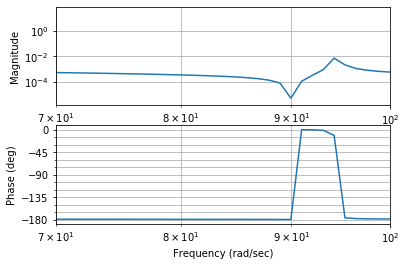

In [11]:
# Diagrama de Bode
mag, phase, omega = ctrl.bode_plot(SS)
plt.xlim([70, 100])

Vemos que tenemos la misma respuesta en frecuencia que teniamos en el TP1, por lo que se podria concluir que el la representacion es espacio de estados es correcta, pero aun asi veamos como es la solucion forzada.

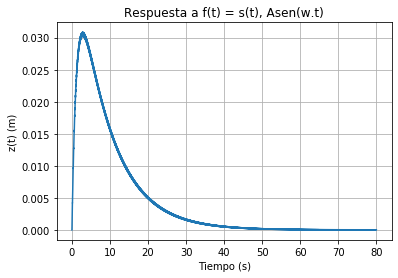

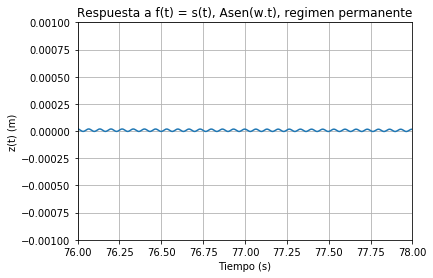

In [15]:
t0=0
t1=80
nt= 50000
t= np . linspace ( t0 , t1 , nt )
f= A*np.sin(omega*t)
t, zout= ctrl.forced_response(SS,t, f )

# Respuesta a la perturbacion senoidal, la solucion forzada.
plt.plot(t, zout)
plt.ylabel('z(t) (m)')
plt.xlabel('Tiempo (s)')
plt.title('Respuesta a f(t) = s(t), Asen(w.t)')
plt.grid()
plt.show()

#Solucion forzada entre los 76 a 78 segundos.
plt.plot(t, zout)
plt.ylim([-0.001, 0.001])
plt.xlim([76, 78])
plt.ylabel('z(t) (m)')
plt.xlabel('Tiempo (s)')
plt.title('Respuesta a f(t) = s(t), Asen(w.t), regimen permanente')
plt.grid()
plt.show()


Se reafirma que es el mismo.
entonces queda hacer el grafico de las variables de estado, para ello se opta por cambiar la matriz **C** por la matriz identidad 4x4 de forma de obtener todas las salidas desacopladas.

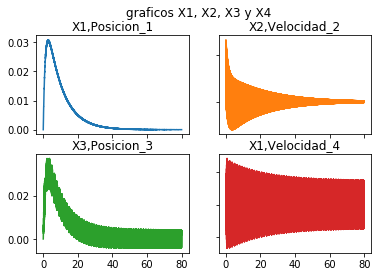

In [18]:
CC= np.identity(4)
DD= np.zeros((4,1))
#Modifico el modelo en espacio de estados.
SS2= ctrl.ss(AA, BB, CC, DD)
#print('SS = ', SS)
#X0= np.zeros((4,1))

t, zout= ctrl.forced_response(SS2, t, f)
# Respuesta a la perturbacion senoidal, la solucion forzada.
x1 = zout [0 ,:]
x2 = zout [1 ,:]
x3 = zout [2 ,:]
x4 = zout [3 ,:]

#plt.plot(t, x1)
#plt.ylabel('z(t) (m)')
#plt.xlabel('Tiempo (s)')
#plt.title('Respuesta a f(t) = s(t), Asen(w.t)')
#plt.grid()
#plt.show()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('graficos X1, X2, X3 y X4')
ax1.plot(t, x1)
ax1.set_title("X1,Posicion_1")
ax2.plot(t, x2, 'tab:orange')
ax2.set_title("X2,Velocidad_2")
ax3.plot(t, x3, 'tab:green')
ax3.set_title("X3,Posicion_3")
ax4.plot(t, x4, 'tab:red')
ax4.set_title("X1,Velocidad_4")

for ax in fig.get_axes():
    ax.label_outer()


3. Utilizar las funciones de la biblioteca de control para convertir de descripción en variables de estado a modelo en transferencia y verificar que se obtiene la transferencia esperada.

In [104]:
ctrl.ss2tf(SS)

TransferFunction(array([-2.22044605e-15,  3.33333333e+00, -1.36424205e-11,  2.70000000e+04]), array([1.0000e+00, 1.0000e+00, 8.9101e+03, 8.1000e+03, 8.1000e+02]))

In [23]:
polos = ctrl.pole(SS)
ceros = ctrl.zero(SS)

In [26]:
print('El sistema tiene ceros en C1 =  {} , C2 = {} .'.format(ceros[0],ceros[1]))
print('El sistema tiene polos en s1 =  {} , s2 = {}, s3 =  {} y s4 = {} .'.format(polos[0],polos[1],polos[2],polos[3]))

El sistema tiene ceros en C1 =  90j , C2 = -90j .
El sistema tiene polos en s1 =  (-0.04545125705060671+94.39239580122364j) , s2 = (-0.04545125705060671-94.39239580122364j), s3 =  (-0.11439478019465321+0j) y s4 = (-0.7947027057041337+0j) .


estos ceros y polos son los mismos obtenidos en el TP1 por lo que es la misma transferencia.